In [120]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import math
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [121]:
def load_image(infilename) :
    img = Image.open(infilename).convert('L')
    img.load()
    data = np.asarray(img, dtype="int32" )
    return data

In [122]:
data = load_image('./01.jpg')

In [123]:
data.shape

(2100, 1575)

In [124]:
data

array([[73, 72, 68, ..., 71, 72, 72],
       [69, 69, 67, ..., 70, 70, 69],
       [68, 70, 70, ..., 71, 71, 70],
       ...,
       [63, 63, 63, ..., 71, 70, 69],
       [59, 62, 64, ..., 67, 69, 70],
       [60, 63, 66, ..., 65, 68, 69]], dtype=int32)

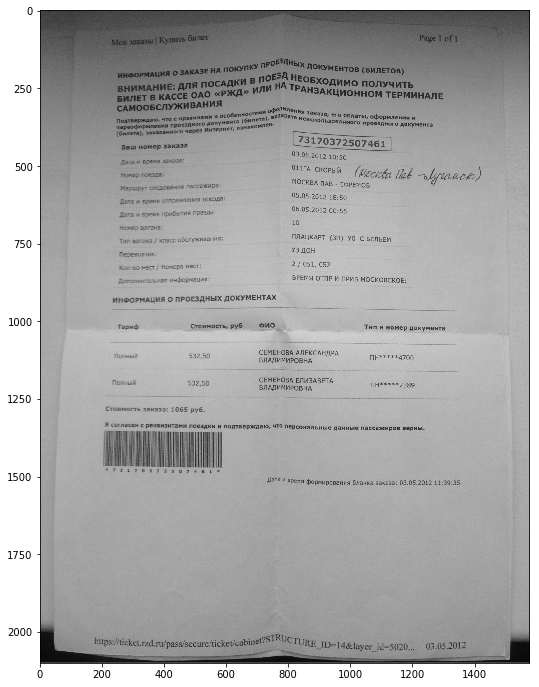

In [125]:
plt.figure(figsize=(15, 12))
plt.imshow(data, cmap='gray', vmin=0, vmax=255)

In [126]:
np.array([[1, 2, -1], [4, 5, -6]]).cumsum(axis=0).cumsum(axis=1)

array([[ 1,  3,  2],
       [ 5, 12,  5]])

In [167]:
def getat(data, x, y):
    if x >= 0 and y >= 0:
        return data[x, y]
    else:
        return 0

def getWindowMean(data, y, x, window):
    h, w = data.shape
    
    x1 = np.clip(x + window,     -1, w - 1)
    y1 = np.clip(y + window,     -1, h - 1)
    x2 = np.clip(x - window - 1, -1, w - 1)
    y2 = np.clip(y - window - 1, -1, h - 1)
    #print(x1, y1, x2, y2)
    N = (x2 - x1) * (y2 - y1)
    if N > 0:
        return (getat(data, y1, x1) + getat(data, y2, x2) - getat(data, y2, x1) - getat(data, y1, x2)) / N, N
    else:
        return 0, 0

def getWindowStdev(data, meandata, x, y, window):
    std, N = getWindowMean(data, x, y, window)
    mean, _ = getWindowMean(meandata, x, y, window)
    if N > 1:
        return np.sqrt((std * N - (mean * N) ** 2 * N) / (N - 1))
    else:
        return 0

In [171]:
def binarizeNiblack(img, t=1, w=1, k=-1):
    height, width = img.shape
    integralimg = img.cumsum(axis=0).cumsum(axis=1)
    integral2img = (img ** 2).cumsum(axis=0).cumsum(axis=1)
    
    img_area = height * width
    print('Area =', img_area)
    
    img_mean = img.mean()
    T_stdev = np.sqrt(((img - img_mean) ** 2).sum() / img_area)
    
    print("T_stdev =", T_stdev)
    
    ans = np.zeros_like(img)
    Ts = np.zeros_like(img)
    
    for i in tqdm(range(height)):
        for j in range(width):
            prev_mean = -1.
#             for window in range(20, max(height, width)):
#                 mean, _ = getWindowMean(integralimg, i, j, window)

#                 if mean > prev_mean:
#                     prev_mean = mean
#                 else:
#                     break
            window = 30
            mean,  _ = getWindowMean(integralimg, i, j, window)
            stdev    = getWindowStdev(integralimg, integral2img, i, j, window)
            T = mean + k * stdev
            Ts[i, j] = T
            ans[i, j] = 255 if (img[i, j] > T) else 0
    return ans, Ts

In [172]:
for aaa in range(1, 5):
    print('lol')
print(aaa)

lol
lol
lol
lol
4


In [173]:
bindata, ts = binarizeNiblack(data)

Area = 3307500
T_stdev = 32.850394421817555


/home/celidos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 12))
plt.imshow(bindata, cmap='gray', vmin=0, vmax=255)

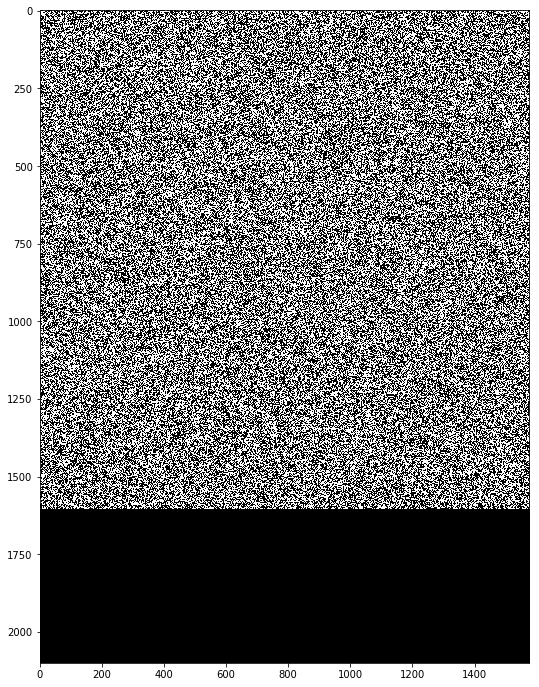

In [157]:
plt.figure(figsize=(15, 12))
plt.imshow(ts, cmap='gray', vmin=0, vmax=255)